In [22]:
#importing OS
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats 

In [23]:
#changing Working Directory
os.chdir('C:\\Users\\chels\\downloads')

In [24]:
#importing data
m_21 = pd.read_csv("movies_21st_century.csv", index_col='imdbID')
m_20 = pd.read_csv("movies_20th_century.csv", index_col='imdbID')
m_19 = pd.read_csv("movies_19th_century.csv", index_col='imdbID')
g=pd.read_csv("genres.csv", index_col='imdbID')

In [25]:
#Creating a single dataset 
movie=m_19.append(m_20).append(m_21) 
movies=movie[['Year','Runtime']]
movies.sort_values('Year')

,Year,Runtime
imdbID,,
tt2116898,1889,NaN
tt0466876,1889,NaN
tt2116968,1890,NaN
tt1202028,1890,1 min
tt0241735,1891,NaN
...,...,...
tt3715936,2021,NaN
tt5891084,2022,NaN
tt4977768,2022,NaN


In [26]:
#CONVERTING HOURS INTO MINS

movies.dropna(subset = ["Runtime"], inplace=True)


#separating hours from mins
movie_h = movies[movies['Runtime'].str.contains('h')]
mov_h=movie_h['Runtime'].str.split('h', expand=True)


mov_h.rename( columns={0 :'A'}, inplace=True )#Rename
mov_h.rename( columns={1 :'B'}, inplace=True )

mov_h["B"] = mov_h["B"].replace(r'^\s*$', np.NaN, regex=True) # replacing emply string with NaN
mov_h["B"] = mov_h["B"].str.replace(" min","")
mov_h['A']=mov_h['A'].astype('int') #changing dtype
#converting hours into mins
mov_h['A']=mov_h['A']*60

mov_h["B"]=mov_h[mov_h.B != ' 43 mi'] #removing exception
mov_h['B']=mov_h['B'].astype('float')
mov_h['B'] = mov_h['B'].fillna(0)

mov_h['A'] = mov_h['A']+mov_h['B']
del mov_h['B']


#Clearing data containing only min values
movie_m=movies[movies["Runtime"].str.contains("h")==False]
del movie_m['Year']

movie_m.rename( columns={'Runtime' :'B'}, inplace=True ) # rename
movie_m["B"] = movie_m["B"].str.replace(" min","") #removing "min"


movie_m = (movie_m.drop(['B'], axis=1)
         .join(movie_m[['B']].apply(pd.to_numeric, errors='coerce')))

movie_m = movie_m[movie_m[['B']].notnull().all(axis=1)]
movie_m['B'] = movie_m['B'].fillna(0)

#changing dtype to integer
movie_m['B']=movie_m['B'].astype('int')
#adding Converted columns to movies
movies = movies.merge(movie_m,on='imdbID',how= 'outer') 
movies=movies.merge(mov_h,on='imdbID',how= 'outer')
movies['B'] = movies['B'].fillna(0)
movies['A'] = movies['A'].fillna(0)
movies['A']=movies['A']+movies['B']
movies['A'].values.tolist()

del movies['Runtime']

del movies['B']
movies.rename( columns={'A' :'Runtime_mins'}, inplace=True )
movies= movies.replace(0, pd.np.nan).dropna()
movies





<ipython-input-26-a0e11e79961c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(subset = ["Runtime"], inplace=True)
C:\Users\chels\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
<ipython-input-26-a0e11e79961c>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_m["B"] = movie_m["B"].st

,Year,Runtime_mins
imdbID,,
tt0222768,1898,1.0
tt1672822,1897,1.0
tt0213657,1897,1.0
tt2461054,1896,1.0
tt0000162,1897,1.0
...,...,...
tt8095034,2018,30.0
tt8110630,2018,57.0
tt8140564,2018,121.0


# 

# 1. Studying Trends in Average Runtime over the Years

Text(0, 0.5, 'Runtime')

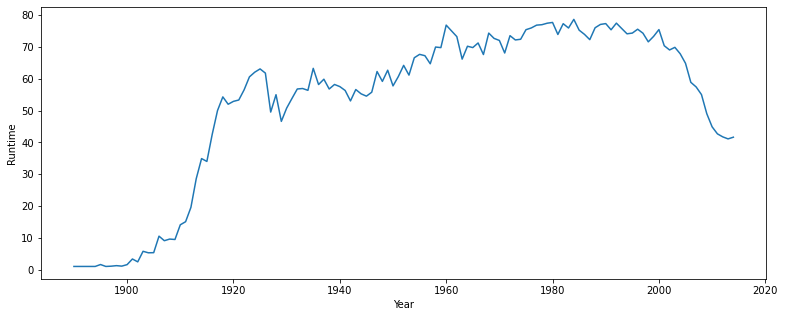

In [27]:
#PREPARING DATA

#Grouping by year
total_time = movies['Runtime_mins'].groupby(movies['Year']) 

  
# printing the means value
a=(total_time.mean()).reset_index(name="Time")

#Considering values before 2014
a["Year"]=a[a["Year"]<= 2014]
a=a.dropna()


#creating plot
fig,ax=plt.subplots()
ax.plot(a['Year'], a['Time'])#basic plotting
fig.set_size_inches(13,5) #adjusting size
#labeling axes
ax.set_xlabel('Year') 
ax.set_ylabel('Runtime')

Text(0, 0.5, 'Shorts')

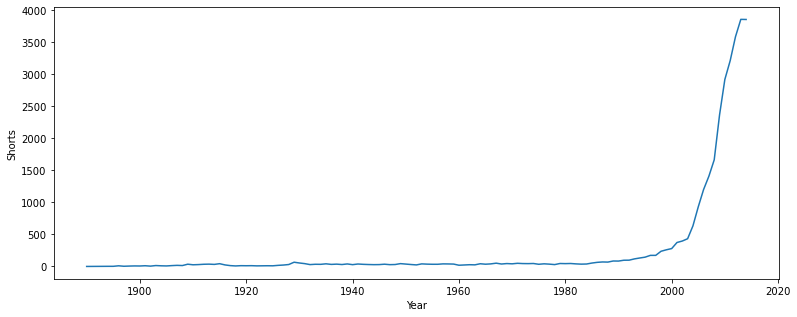

In [28]:
#Prepareing Data on Shorts
z=g[g['Genre'].str.contains( 'Short')==True ] #Removing other genres except shorts
z=z.merge(movies["Year"],on='imdbID',how='inner') #intersection with Year 

dummy=pd.get_dummies(z, columns=['Genre'])  #Converting "Short" into "1"

shorts = dummy.groupby(['Year'], as_index=False)['Genre_Short'].aggregate(sum) #grouping by year and summing number of shorts 
                                                                               #produced per year
    
shorts=shorts[shorts["Year"]<=2014] #Considering values before 2014

#creating plot
fig,ax=plt.subplots()
ax.plot(shorts['Year'], shorts['Genre_Short'])#basic plotting
fig.set_size_inches(13,5) #adjusting size
#labeling axes
ax.set_xlabel('Year') 
ax.set_ylabel('Shorts')

<b>In this analysis, in the first plot, we see average Runtime over the years has shown consistent increase except from the 90s, a downward trend is observed. This spurs a question as to why runtimes are not increasing although there is a weak positive correlation between ratimgs and runtime. The answer to this lies behind the increasing production of shorts ( ref. plot 2)  indicating its rising popularity in the future. </b>

# 

# 

# The relationship between Ratings and Runtime

In [29]:
movies=movies[movies["Year"]>=1901] #Considering only the 20th and 21st centuary
mov = [movies["Runtime_mins"], movie["imdbRating"]]
mov = pd.DataFrame(mov).transpose()

g=pd.read_csv('genres.csv',index_col='imdbID')
#Cleaning data
g["Genre"]=g["Genre"].str.strip() #Removing whitespaces

#grouping Genre for each imdbID
b =g.groupby('imdbID').agg({'Genre': ', '.join}).reset_index()

#Removing rows where genre is not related to films
b=b[b['Genre'].str.contains( 'Short')==False ]
b= b[b['Genre'].str.contains( 'Documentary')==False ]
b= b[b['Genre'].str.contains( 'News')==False ]
b= b[b['Genre'].str.contains( 'Reality-TV')==False ]
b= b[b['Genre'].str.contains( 'Talk-Show')==False ]
b= b[b['Genre'].str.contains( 'Game-Show')==False ]


#Considering Ratings of only films
mov=mov.merge(b,on='imdbID',how='inner') #intersection of rows because of inner join
mov=mov.drop(['Genre'], axis = 1) #removing genre after finding runtimes of required genres
mov=mov.dropna() #dropping blank cells

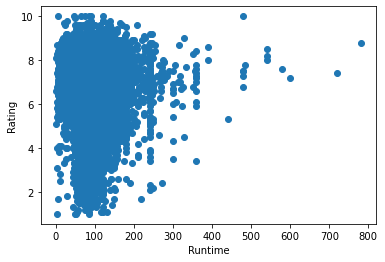

None


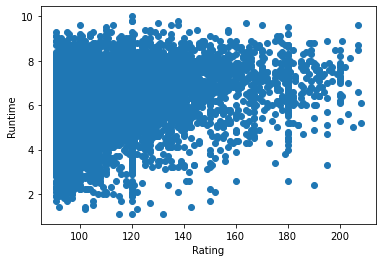

None
Correlation Coefficient =  (0.2515677224748045, 2.2386745981699267e-255)


In [30]:
#Visual Representation

fig,ax=plt.subplots()
#scatter plot and Correlation of Runtime and Rating 
ax.scatter(mov['Runtime_mins'], mov['imdbRating']) #Scatterplot
ax.set_xlabel('Runtime')
ax.set_ylabel('Rating')
print(plt.show())

#focussing on movies between 1.5 to 3.5 hours
a=mov[mov['Runtime_mins']< 210]
aa=a[a['Runtime_mins']> 90]

#scatter plot and Correlation of rating and runtime between 1.5 to 3.5 hours
fig,ax=plt.subplots()
ax.scatter(aa["Runtime_mins"], aa['imdbRating']) #Scatterplot
ax.set_xlabel('Rating')
ax.set_ylabel('Runtime')
print(plt.show())
print("Correlation Coefficient = ",scipy.stats.pearsonr(aa['Runtime_mins'],aa['imdbRating'])) #Correlation

<b>The  scatterplots show the relationship between Runtime and Ratings. 

    The first plot shows the relationship between the variables when no condition has been applied to runtime. However, to get a better understanding of the relationship between the variables, we refine the plot further by only considering runtime of 1.5 to 3.5 hours (Average runtime of films)
    The resultant second plot shows a faint trend. 
    
    We see that for movies with runtime between 90 to 100 mins, the runtime has no effect on rating. But as the runtime increases, the movies are lesser and lesser likely to receive a low rating. 

    Correlation between Ratings and Runtime is 0.25, which is a weak positive correlation. As runtime increases, ratings also show slight increase. 

   Movies can get a better rating due to various variables like plot, acting,etc. but a possible reasoning for runtime influencing ratings could be, that the  longer the runtime, the more likely is a larger budget allocated to it. 
And larger the budget the better the quality of production. Hence the ratings tend to increase </b> 


In [31]:
g['Genre']=g['Genre'].str.strip()

# 

In [32]:
#Cleaning data

movie=movie.merge(g.drop(columns=['Unnamed: 0']),on='imdbID')
movies=movie[['Year','imdbRating','Genre']]

movies = movies[movies["Year"]>=2001]
movies = movies[movies["Year"]<=2014]#Considering only the 21st centuary
movies = movies[movies["Genre"]!="Short"]

#Creating dummies of genre
dummy=pd.get_dummies(movies, columns=['Genre']) 


#Getting top10 genre
top10 = (dummy.iloc[:, 2:28] 
              .sum() 
              .sort_values(ascending=False) 
              .head(10) 
              .index.values)
top10




array(['Genre_Drama', 'Genre_Documentary', 'Genre_Comedy', 'Genre_Adult',
       'Genre_Music', 'Genre_Horror', 'Genre_Action', 'Genre_Romance',
       'Genre_Family', 'Genre_Animation'], dtype=object)

In [33]:
#droping rows with NaN
movies = movies.dropna(how = 'any')

#Finding average mean of each genre for each year
m_ratings = movies.groupby(['Year', 'Genre'], as_index=False)['imdbRating'].aggregate(np.mean)


In [34]:
#creating a dataset for Top10 genre
a = m_ratings['Genre'].isin(["Drama"])
aa=m_ratings[a]                             
       
b = m_ratings['Genre'].isin(["Animation"])
bb=m_ratings[b]

c = m_ratings['Genre'].isin(["Comedy"])
cc=m_ratings[c]

d = m_ratings['Genre'].isin(["Documentary"])
dd=m_ratings[d]

e = m_ratings['Genre'].isin(["Action"])
ee=m_ratings[e]

f = m_ratings['Genre'].isin(["Horror"])
ff=m_ratings[f]

g = m_ratings['Genre'].isin(["Romance"])
gg=m_ratings[g]

h = m_ratings['Genre'].isin(["Family"])
hh=m_ratings[h]

i = m_ratings['Genre'].isin(["Adult"])
ii=m_ratings[i]

j = m_ratings['Genre'].isin(["Music"])
jj=m_ratings[j]

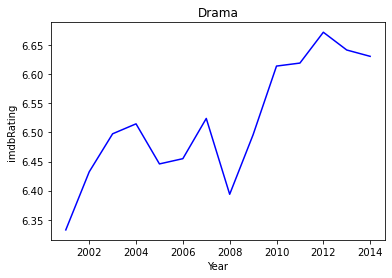

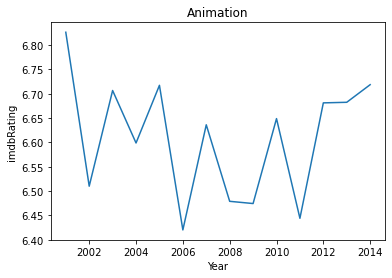

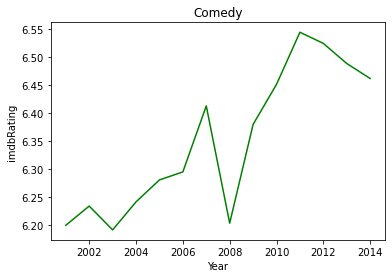

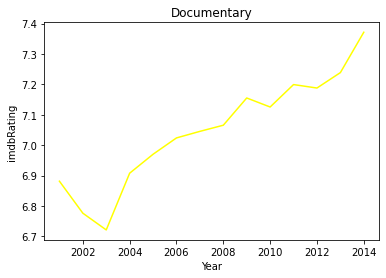

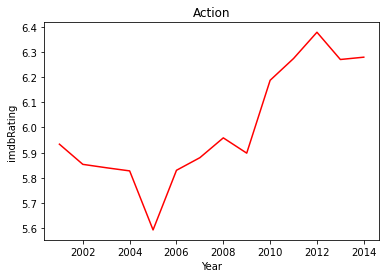

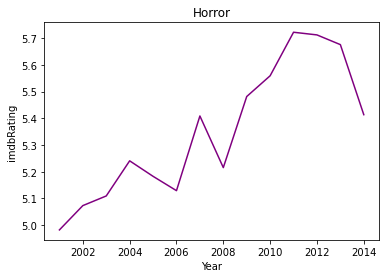

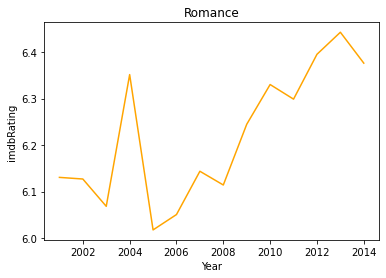

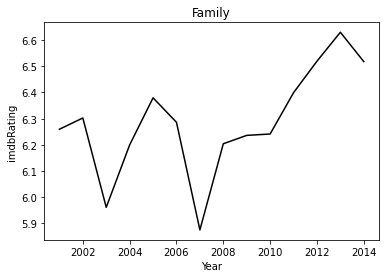

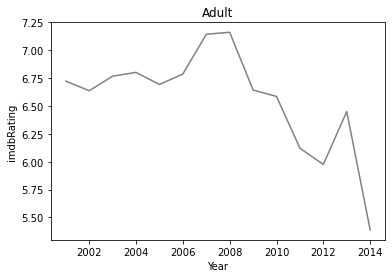

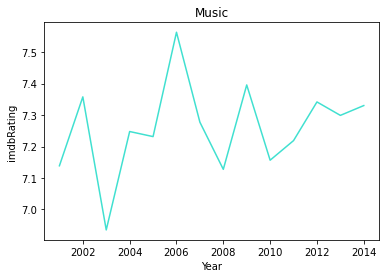

In [35]:
#plotting all top10 graphs

fig,ax=plt.subplots()
ax.plot(aa['Year'], aa['imdbRating'], c ="blue") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Drama")
plt.show()

fig,ax=plt.subplots()
ax.plot(bb['Year'], bb['imdbRating']) #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Animation")
plt.show()

fig,ax=plt.subplots()
ax.plot(cc['Year'], cc['imdbRating'], c ="green") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Comedy")
plt.show()

fig,ax=plt.subplots()
ax.plot(dd['Year'], dd['imdbRating'], c ="yellow") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Documentary")
plt.show()

fig,ax=plt.subplots()
ax.plot(ee['Year'], ee['imdbRating'], c ="red") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Action")
plt.show()


fig,ax=plt.subplots()
ax.plot(ff['Year'], ff['imdbRating'], c ="purple") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Horror")
plt.show()

fig,ax=plt.subplots()
ax.plot(gg['Year'], gg['imdbRating'], c ="orange") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Romance")
plt.show()

fig,ax=plt.subplots()
ax.plot(hh['Year'], hh['imdbRating'], c ="black") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Family")
plt.show()

fig,ax=plt.subplots()
ax.plot(ii['Year'], ii['imdbRating'], c ="grey") #basic plotting
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Adult")
plt.show()

fig,ax=plt.subplots()
ax.plot(jj['Year'], jj['imdbRating'], c ="turquoise") 
ax.set_xlabel('Year')
ax.set_ylabel('imdbRating')
plt.title("Music")
plt.show()

<b>In this analysis, we aim to see the trends in ratings of the top 10 most produced genres of the 21st century. 
    We only consider data of the 20th century as it is the recent past. The data post 2014 has be cleared as several missing     values will affcet average rating.

   As compared to the other genres we see that Horor has the least ratings (on average) as it has not crossed a rating of 6 while the other genres have.
    Adult movies do not seem to have much scope with its decilining rating over the years.

  All genres are showing an upwards trend except Adult which is going downwards and Music and Animation which look stationary.     Ratings of documentaries and music are the highest as their recent ratings are above 7 in the, However, only documentaries show an upward. This could serve as an indication to predict it's rising popularity in the future.

  Other genres like Drama, Comedy, Action, Romance, Family have their latest ratings averaging to 6.5. </b>